# Lecture 1

## Exercise 1.1
1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ ($M = 10^4$) as a function of the number of blocks, $N$</font>.

In [171]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import chi2
from scipy.optimize import curve_fit
import math

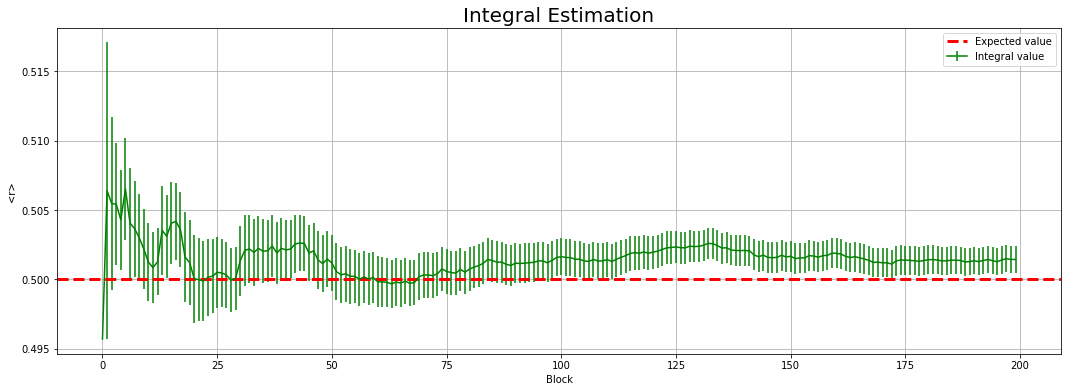

In [172]:
mean_path = 'output/es1_1_mean.txt'
devstd_path = 'output/es1_1_devstd.txt'
v_mean = np.loadtxt(mean_path)
v_devstd = np.loadtxt(devstd_path)

x = np.arange(len(v_mean))

plt.figure(figsize=(18, 6))
plt.errorbar(x ,v_mean, yerr = v_devstd, color='green', label='Integral value')
plt.axhline(y=0.5, color='r', linestyle='--', label='Expected value', linewidth=3)
plt.title('Integral Estimation', fontsize=20)
plt.xlabel('Block')
plt.ylabel('<r>')
plt.legend()
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ ( $M = 10^4$) as a function of the number of blocks, $N$</font>.

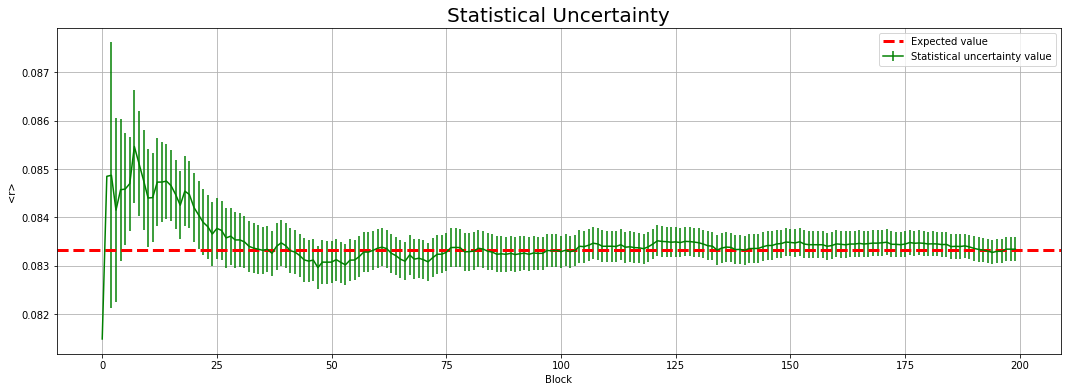

In [192]:
mean_path = 'output/es1_2_mean.txt'
devstd_path = 'output/es1_2_devstd.txt'
v_mean = np.loadtxt(mean_path)
v_devstd = np.loadtxt(devstd_path)
x = np.arange(len(v_mean))
plt.figure(figsize=(18, 6))
plt.errorbar(x ,v_mean, yerr = v_devstd, color='green', label='Statistical uncertainty value')
plt.axhline(y=1/12.0, color='r', linestyle='--', label='Expected value', linewidth=3)
plt.title('Statistical Uncertainty', fontsize=20)
plt.xlabel('Block')
plt.ylabel('<r>')
plt.legend()
plt.grid(True)
plt.show()

---

The hypothesis is that numbers \( r \) are drawn from a uniform distribution. In statistics, we cannot definitively prove such hypotheses because pseudo-random numbers come from deterministic algorithms. Instead, we estimate the probability that \( r \) deviates from a uniform distribution. A low probability allows us to reject this hypothesis.

Pearson's cumulative test statistic \(\chi^2\) measures the discrepancy between observed \( O_i \) and expected \( E_i \):
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator measures squared deviations, compared with expected squared fluctuations (variance) of the distribution. Why variance = \( E_i \)? The binomial distribution gives the probability of \( k \) successes in \( n \) trials:
$$Pr(X=k) = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the binomial distribution is \( \langle X \rangle = np \), and its variance is \( \sigma^2 = np (1-p) \). For small \( p \), \( \sigma^2 \approx np \), explaining \( E_i \) in \( \chi^2 \).

### Implementation
1. Divide \( [0,1] \) into \( M \) sub-intervals and apply the \(\chi^2\) test.
2. Expect \( n/M \) events per sub-interval after \( n \) throws from a uniform distribution.
3. Fix \( M = 10^2 \) and use \( n = 10^4 \) pseudo-random numbers sequentially, 100 times.
4. <font color="red">Plot \(\chi^2_j\) for \( j = 1, ..., 100 \)</font>.
5. The \(\chi^2\) statistic:
   $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
   A higher \(\chi^2\) indicates \( n_i \) are less likely drawn from a uniform distribution.
6. <font color="red">Compare histogram of \(\chi^2_j\) with the expected probability distribution</font>.


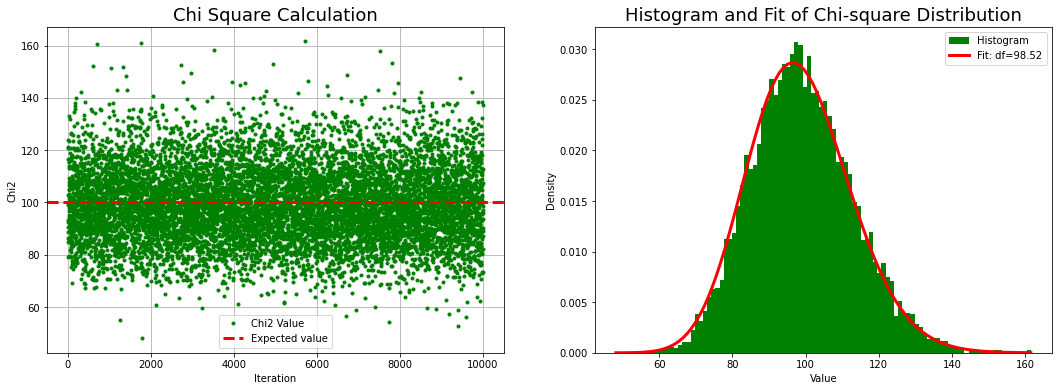

In [174]:
path = "output/es1_Chi2.txt"
data_chi2 = np.loadtxt(path)
x = np.arange(len(data_chi2))

path = "output/es1_Chi2.txt"
data_chi2 = np.loadtxt(path)

n_bins = 100
hist, hist_bins = np.histogram(data_chi2, bins=n_bins, density=True)

# Define PDF function for Chi-square distribution
def chi2_pdf(x, df):
    return chi2.pdf(x, df)

# Curve fitting to chi-square PDF
popt, _ = curve_fit(chi2_pdf, hist_bins[:-1], hist, p0=100)  # Initial guess p0=100 for df
x_chi2 = np.linspace(np.min(hist_bins), np.max(hist_bins), 100)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.title("Chi Square Calculation", fontsize=18)
plt.plot(x , data_chi2, ".", color="green", label='Chi2 Value')
plt.axhline(y=100, color='r', linestyle='--', label='Expected value', linewidth=3)
plt.xlabel('Iteration')
plt.ylabel('Chi2')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(data_chi2, bins=hist_bins, density=True, label='Histogram', color='green')
plt.plot(x_chi2, chi2_pdf(x_chi2, *popt), '-', color='red', label=f'Fit: df={popt[0]:.2f}', linewidth=3)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Fit of Chi-square Distribution', fontsize=18)
plt.legend()
plt.show()
plt.show()

## Exercise 1.2 

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ 
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice, an *exponential* dice (use $\lambda=1$) and a *Lorentzian* dice (use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

In [175]:
# Function to create the histograms
def plot_histograms(data_array, suptitle, colors, labels):
    plt.figure(figsize=(18, 10))
    plt.suptitle(suptitle, fontsize=24)
    
    for i in range(data_array.shape[1]):
        plt.subplot(2, 2, i + 1)
        plt.hist(data_array[:, i], range=(a, b), bins=100, color=colors[i])
        plt.title("N = " + labels[i], fontsize=15)
        plt.xlabel('Value')
        plt.ylabel('Number of throws')
        plt.grid(True)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
colors = ['#006400', '#228B22', '#32CD32', '#7FFF00']
labels = ["1", "2", "10", "100"]

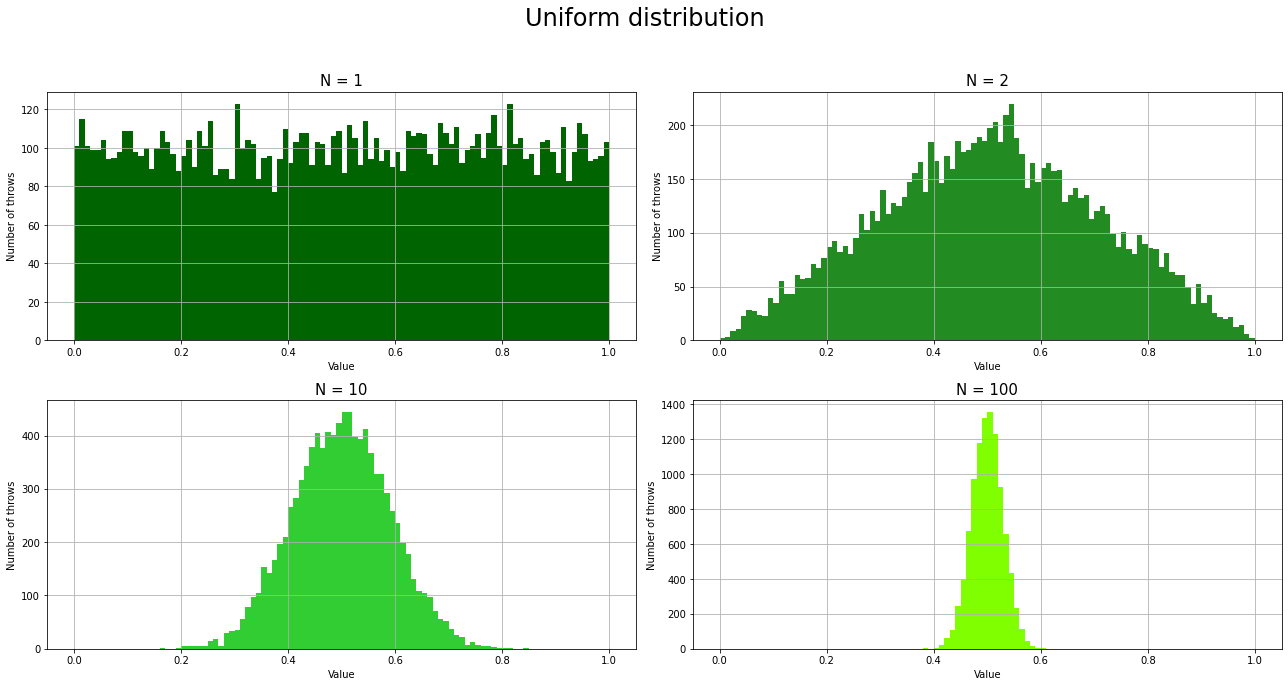

In [191]:
path_es2_unif = "output/es2_unif.txt"
v_unif = np.loadtxt(path_es2_unif)
plot_histograms(v_unif, "Uniform distribution", colors, labels, 0, 1)

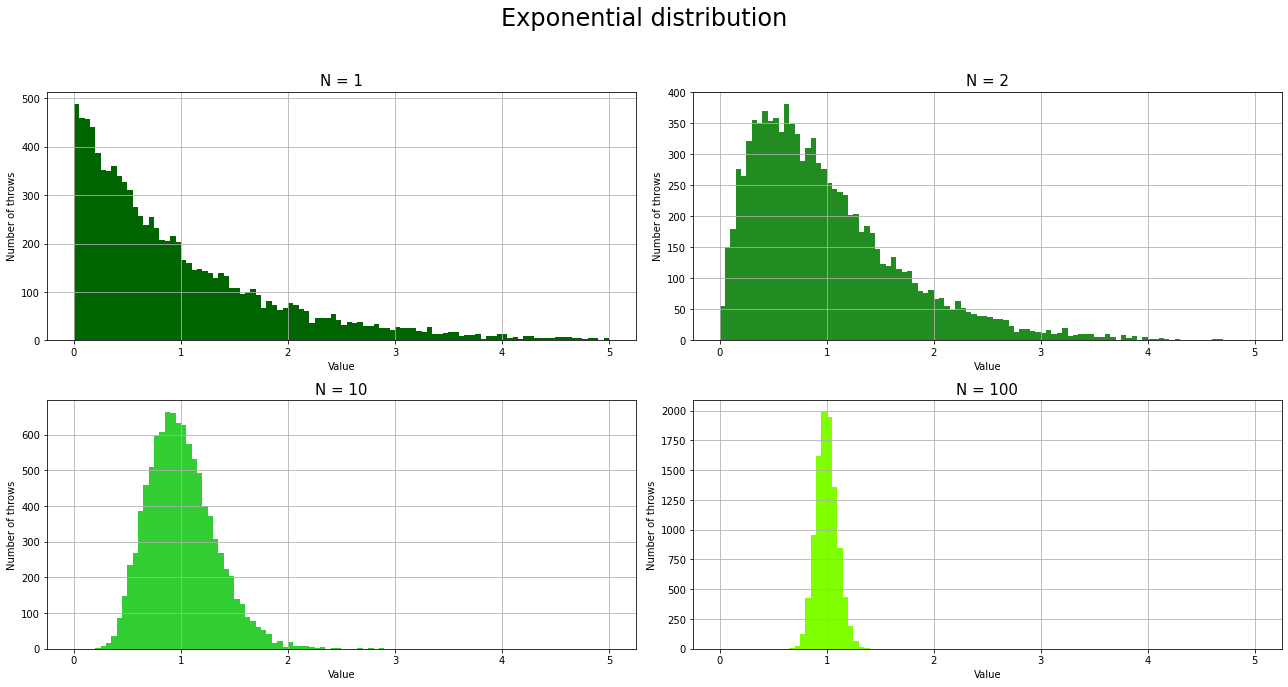

In [177]:
path_es2_exp = "output/es2_exp.txt"
v_exp = np.loadtxt(path_es2_exp)
plot_histograms(v_exp, "Exponential distribution", colors, labels, 0, 5)

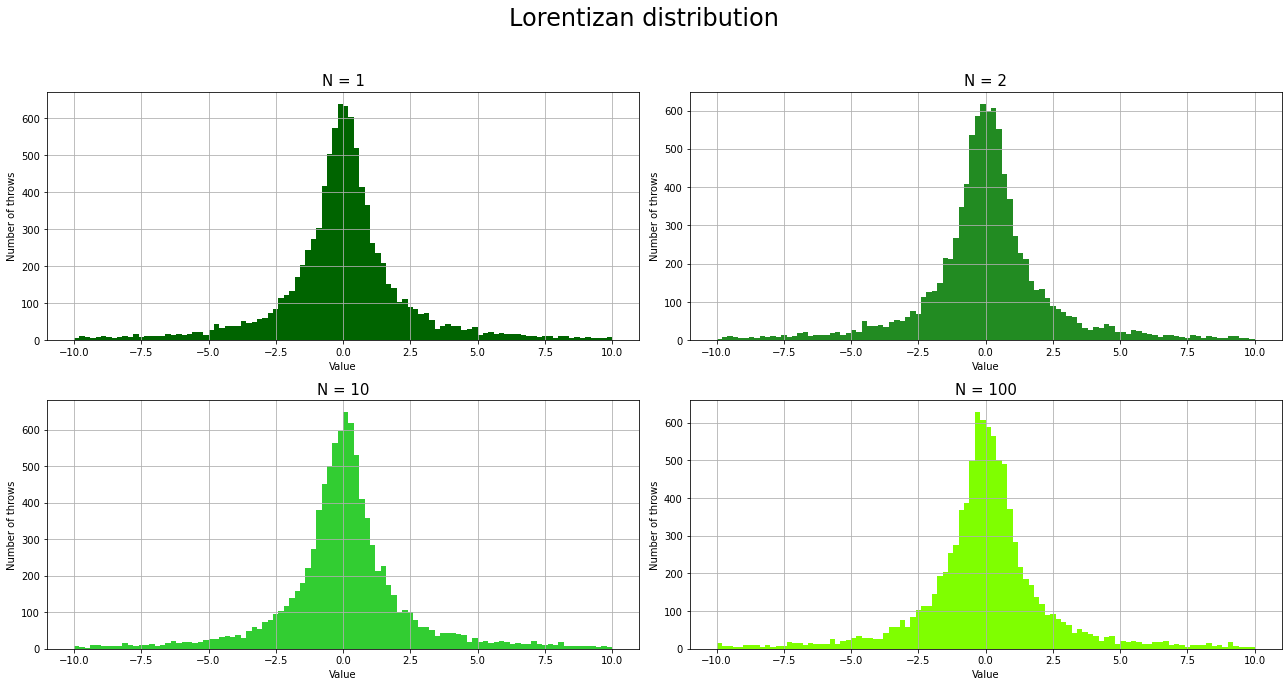

In [178]:
path_es2_lorentz = "output/es2_lorentz.txt"
v_lorentz = np.loadtxt(path_es2_lorentz)
plot_histograms(v_lorentz, "Lorentizan distribution", colors, labels, -10, 10)

## Exercise 1.3 

- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font>. If possible, do not use $\pi$ to evaluate $\pi$.

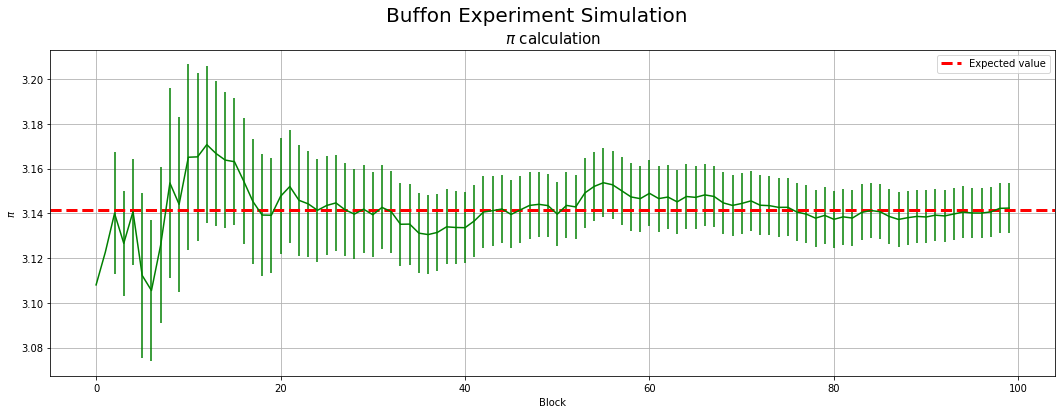

In [189]:
pi_value_path = 'output/es3_PiValues.txt'
devstd_path = 'output/es3_Error.txt'
v_pi = np.loadtxt(pi_value_path)
v_error = np.loadtxt(devstd_path)
x = np.arange(len(v_pi))
plt.figure(figsize=(18, 6))
plt.suptitle('Buffon Experiment Simulation', fontsize=20)
plt.title('$\pi$ calculation', fontsize=15)
plt.errorbar(x ,v_pi, yerr = v_error, color='green')
plt.axhline(y=math.pi, color='r', linestyle='--', label='Expected value', linewidth=3)
plt.xlabel('Block')
plt.ylabel(r'$\pi$')
plt.legend()
plt.grid(True)
plt.show()

Simulating the Buffon Experiment without using the known value of π required implementing an alternative method to sample angles uniformly within the range [0, $\frac{\pi}{2}$]. I employed a rejection method where, after generating two random numbers uniformly distributed in [0, 1), I computed their Euclidean distance. If this distance was less than 1, I used the arctangent function to compute the angle $\theta$.